<a href="https://colab.research.google.com/github/gajulalakshmilikhitha27/DEEP-LEARNING/blob/main/EXP_08_Classification_Parameter_Initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXP-6 (Build a classification model using different parameter initialization techniques)**<br> by  Likhitha(222021601015)

In [1]:
import tensorflow as tf                                   # deep learning library. Tensors are just multi-dimensional arrays

In [2]:
mnist = tf.keras.datasets.mnist                           # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()   # unpacks images to x_train/x_test and labels to y_train/y_test

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)       # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)         # scales data between 0 and 1

In [6]:
def model_create(n_layers,initializer):
  model = tf.keras.models.Sequential()                      # a basic feed-forward model
  model.add(tf.keras.layers.Flatten())                      # takes our 28x28 and makes it 1x784
  
  for i in range(n_layers):
    model.add(tf.keras.layers.Dense(128, kernel_initializer=initializer, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
  
  model.add(tf.keras.layers.Dense(10, kernel_initializer=initializer, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

  model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

  return model




In [7]:
zeros_model = model_create(2,tf.keras.initializers.Zeros())
zeros_history = zeros_model.fit(x_train, y_train, epochs=3)  # train the model

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3015 - accuracy: 0.1122
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3013 - accuracy: 0.1124


In [8]:
he_model = model_create(2,tf.keras.initializers.HeNormal())
he_history = he_model.fit(x_train, y_train, epochs=3)  # train the model

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2507 - accuracy: 0.9261
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1043 - accuracy: 0.9682
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0696 - accuracy: 0.9779


In [9]:
xavier_model = model_create(2,tf.keras.initializers.GlorotUniform())
xavier_history = xavier_model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2603 - accuracy: 0.9245
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1064 - accuracy: 0.9683
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0718 - accuracy: 0.9776


In [10]:
def print_layer(model):
 layers = model.layers
 for layer in layers:
  print("Initial Weights")
  print("Layer:",layer,end='\n')
  print("layer weights:  ",layer.weights,end='\n')
  #print("layer bias initializer:  ",layer.bias_initializer)

In [11]:
def evaluate_model(model):
  val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
  print(val_loss)  # model's loss (error)
  print(val_acc)  # model's accuracy

In [12]:
evaluate_model(he_model)

313/313 [==============================] - 1s 1ms/step - loss: 0.0904 - accuracy: 0.9731
0.09035581350326538
0.9731000065803528


(0.0, 2.413105557113886)

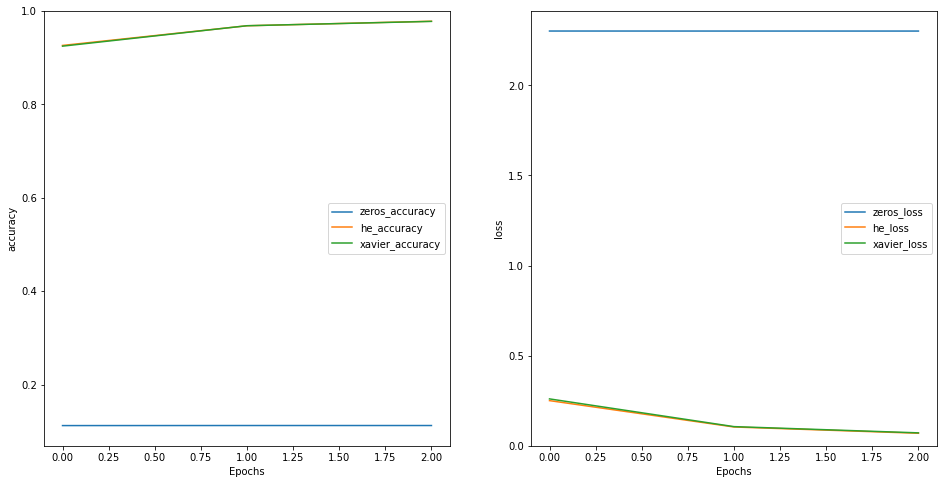

In [13]:
#Plotting metric curves
import matplotlib.pyplot as plt



plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(zeros_history.history['accuracy'])
plt.plot(he_history.history['accuracy'])
plt.plot(xavier_history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['zeros_accuracy', 'he_accuracy', 'xavier_accuracy'])
plt.ylim(None, 1)

plt.subplot(1, 2, 2)
plt.plot(zeros_history.history['loss'])
plt.plot(he_history.history['loss'])
plt.plot(xavier_history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['zeros_loss', 'he_loss', 'xavier_loss'])
plt.ylim(0, None)